In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score



In [54]:
car_df = pd.read_csv("F:/python/car price predection/Car_Price_Prediction-main/car data.csv")
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [55]:
car_df.shape

(301, 9)

In [56]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [57]:
car_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [58]:
# Drop column Car_Name
car_df.drop(['Car_Name'],axis=1,inplace = True)


In [59]:
car_df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [60]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [61]:
car_df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [62]:
car_df[car_df.duplicated()]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


### plot Target variable

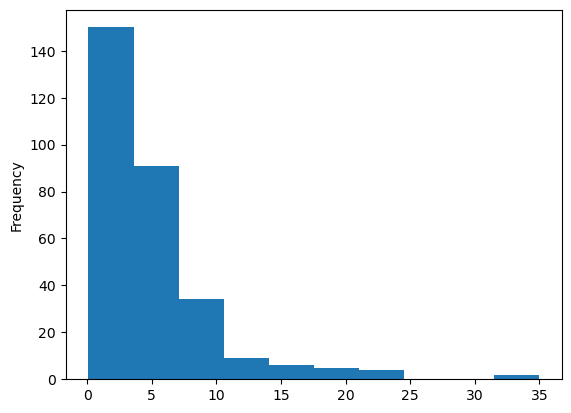

In [63]:
car_df['Selling_Price'].plot(kind = 'hist')
plt.show()

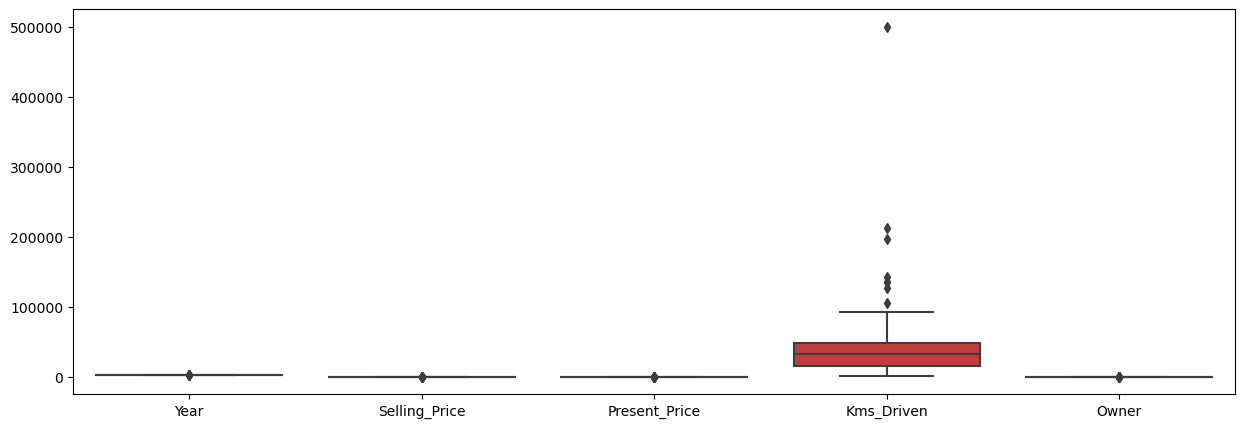

In [64]:
plt.figure(figsize = (15,5))
sns.boxplot(data=car_df)
plt.show()


D:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

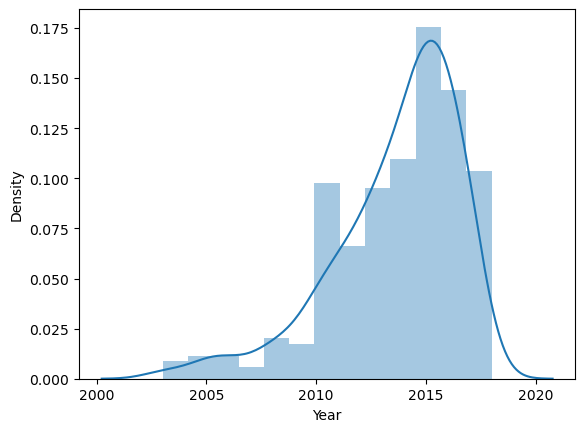

In [65]:
sns.distplot(car_df['Year'])


D:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


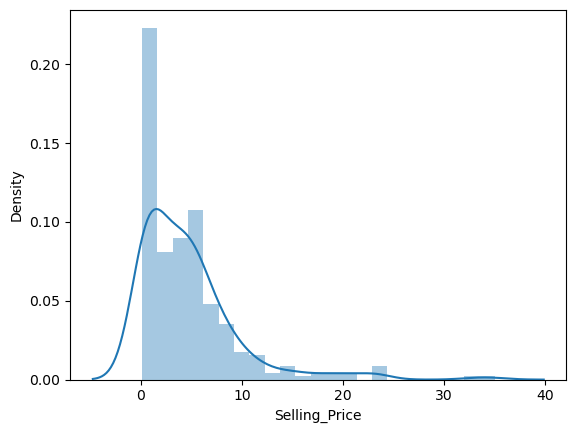

In [66]:
sns.distplot(car_df['Selling_Price'])
plt.show()

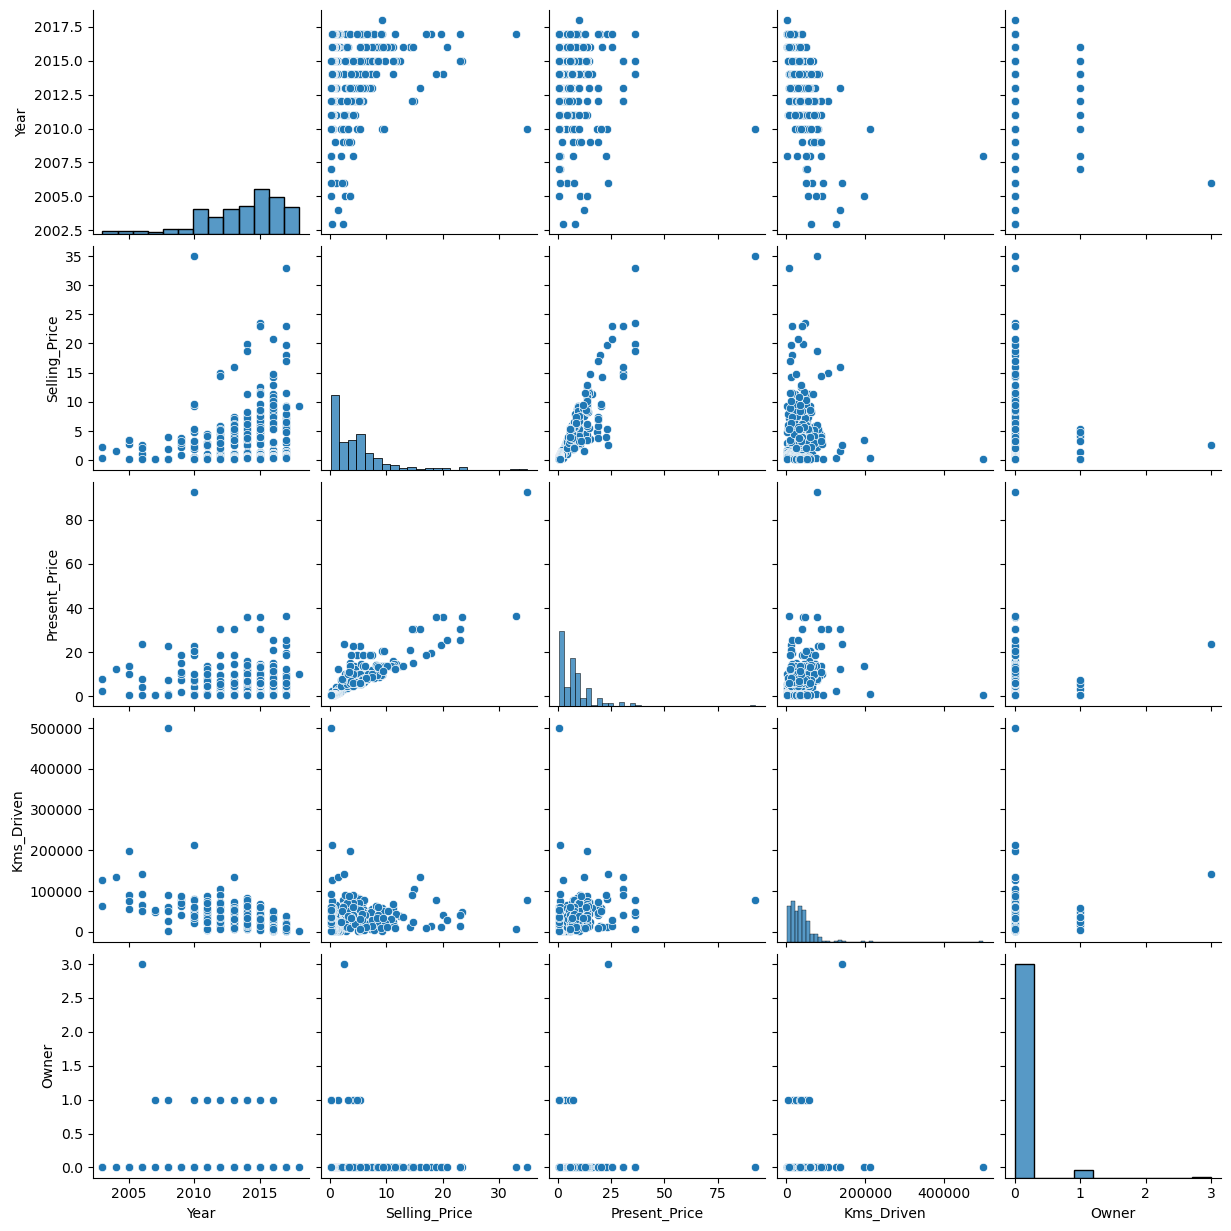

In [67]:
sns.pairplot(car_df)
plt.show()

In [68]:
car_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [69]:
car_df.Fuel_Type.value_counts()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [70]:
car_df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [71]:
car_df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [72]:
car_df = pd.get_dummies(car_df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first
=True)


In [73]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Owner                   301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [74]:
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


# Create a new feature which tells us how old the car is in terms of years

In [75]:
# Substracting the year by current year
car_df['no_of_years'] = 2021 - car_df['Year']

In [76]:
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,2014,3.35,5.59,27000,0,0,1,0,1,7
1,2013,4.75,9.54,43000,0,1,0,0,1,8
2,2017,7.25,9.85,6900,0,0,1,0,1,4
3,2011,2.85,4.15,5200,0,0,1,0,1,10
4,2014,4.60,6.87,42450,0,1,0,0,1,7


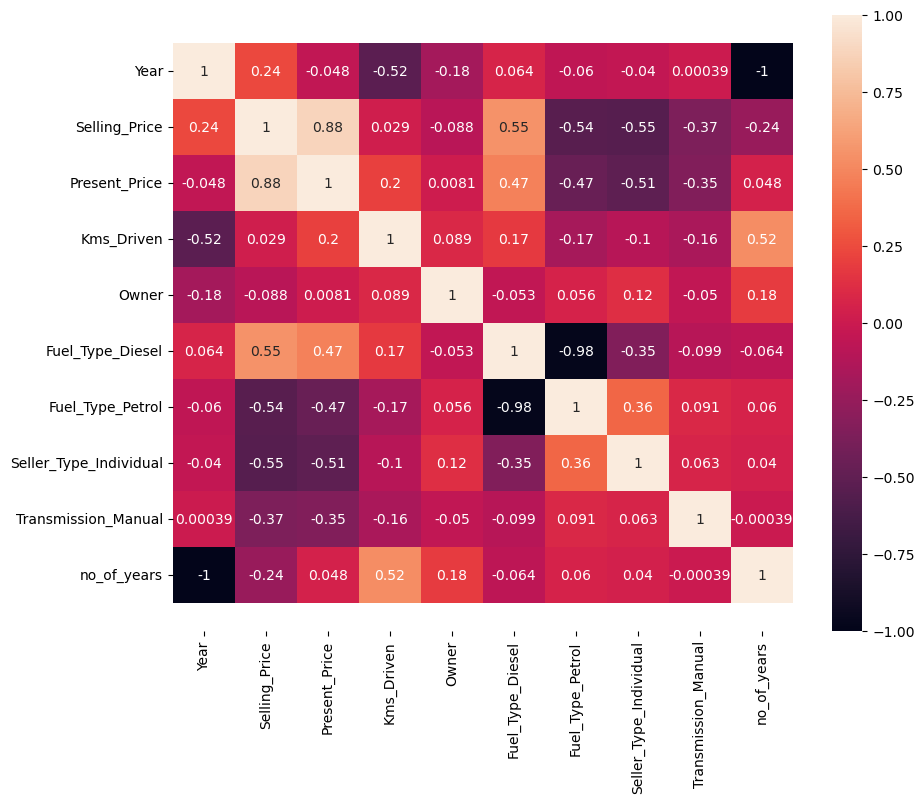

In [77]:
#Heatmap to show the correlation between various variables of the dataset
plt.figure(figsize=(10, 8))
cor = car_df.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


##### Present Price Fuel Type Seller Type


### Linear Regression Model

In [78]:

y = car_df['Selling_Price']
X = car_df.drop(['Selling_Price'],axis=1)


In [79]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)


(210, 9)
(91, 9)
(91,)


In [80]:

#standardization of the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.fit_transform(X_test)


In [81]:
#Building model using sklearn(Gradient Descent)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # training the algorithm
# Getting the coefficients and intercept
print('coefficients:\n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)

#Now predicting on the test data
y_pred = lin_reg.predict(X_test)

coefficients:
 [ 0.61446061  4.0342602  -0.18209819  0.07808457  0.87226802  0.17314277
 -0.52312819 -0.6032581  -0.61446061]

 intercept: 4.748809523809541


D:\Program Files\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df


,Actual,Predicted
0,7.40,8.139241
1,4.00,2.768482
2,0.50,-1.084232
3,3.15,4.108869
4,1.25,0.093750
...,...,...
86,2.70,1.950740
87,0.60,1.061294
88,0.75,1.085983
89,7.90,6.665911
